# Exploring Weather Data from Kaggle User tobycrabtree
<a id='header_cell'></a>
Author: Aidan O'Connor   
Date: 14 May 2021   

This is a continuation of the ```tobycrabtree_cleaning.ipynb``` notebook to conduct exploratory data analysis on the weather [data](https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data?select=spreadspoke_scores.csv) provided by kaggle user tobycrabtree and [NFLWeather.com](http://www.nflweather.com/). First, I'll look at numeric column data individually and in relation to each other. Next, I'll look at categorical column data individually and in relation to each other. I'm hoping to get a sense of how normal the data is and, if not normal, measures of center and standard deviations.

<img src='../../fixtures/images/stefon_diggs.jpeg' alt="" width="800"/>

*...and Stefon Diggs catching it*

### Table of Contents:
<a id='toc_cell'></a>

- [Import Packages and Read in Data](#import_and_read_cell)
- [Dataframe-Level Data Exploration](#dataframe_exploration_cell)
- [Exploring Numerical Data](#exploring_numerical_data_cell)
    - Sub-cells
- [Exploring Categorical Data](#exploring_categorical_data_cell)
    - Sub-cells

## Import Packages and Read in Data
<a id='import_and_read_cell'></a>
We'll start by importing pandas and numpy to handle the data storage and manipulation, then matplotlib's pyplot module and seaborn to visualize the data. I'll also read in the ```days_since_last_game.csv``` and reintegrate the ```days_since_last_game``` column with my ```weather_data.csv```. We'll also set up Jupyter magic to visualize pyplot visualizations inline and set pyplot parameters. Finally, we'll read the data into a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest

In [207]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,7)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../../fixtures/cleaned_data/weather_data.csv')
df1 = pd.read_csv('../../fixtures/cleaned_data/days_since_last_game.csv')

In [60]:
df1['key'] = df1['team_name'] + df1['week_id']
df['home_key'] = df['team_home_short'] + df['week_id']
df['away_key'] = df['team_away_short'] + df['week_id']

In [55]:
df1.drop(['team_name','week_id'], axis = 1, inplace = True)
df1.head(3)

In [310]:
new_df = df.merge(df1, left_on='home_key', right_on='key', how='left')
new_df = new_df.merge(df1, left_on='away_key', right_on='key', how='left')

df['team_home_days_since_last_game'] = new_df['days_since_last_game_x']
df['team_away_days_since_last_game'] = new_df['days_since_last_game_y']

# Check to make sure the changes above stuck
df.head(3)

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,stadium,stadium_neutral,weather_temperature,...,week_day,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,gross_score,home_key,away_key,team_home_days_since_last_game,team_away_days_since_last_game
0,2019-09-05,2019,NaN,Chicago Bears,3.0,10.0,Green Bay Packers,Soldier Field,False,65,...,3,7,East - SouthEast,0.10,0.0,13,CHI2019_1,GB2019_1,365,365
1,2019-09-08,2019,1.0,Arizona Cardinals,27.0,27.0,Detroit Lions,University of Phoenix Stadium,False,72,...,6,0,No wind,0.39,0.0,54,ARZ2019_1,DET2019_1,365,365
2,2019-09-08,2019,1.0,Carolina Panthers,27.0,30.0,Los Angeles Rams,Bank of America Stadium,False,85,...,6,3,East,0.00,0.0,57,CAR2019_1,LAR2019_1,365,365


## Dataframe-Level Data Exploration
<a id='dataframe_exploration_cell'></a>

In [321]:
print(f'There are {df.shape[0]} instances and {df.shape[1]} features in this dataframe, \
including {df.select_dtypes(include = "object").shape[1]} object features \
and {df.select_dtypes(include = "number").shape[1]} numerical features')

There are 512 instances and 26 features in this dataframe, including 12 object features and 13 numerical features


In [8]:
list(df)

['schedule_date',
 'schedule_season',
 'schedule_week',
 'team_home',
 'score_home',
 'score_away',
 'team_away',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'team_away_short',
 'team_home_short',
 'week_id',
 'week_day',
 'weather_wind_mph_number',
 'weather_wind_direction',
 'weather_cloud_cover',
 'weather_precipitation',
 'gross_score']

In [311]:
df.shape

(512, 26)

## Exploring Numerical Data
<a id='exploring_numerical_data_cell'></a>
I'll start by looking at all numerical features then investigate any questions I have along the way

In [322]:
df.describe()

,schedule_season,schedule_week,score_home,score_away,weather_temperature,weather_humidity,week_day,weather_wind_mph_number,weather_cloud_cover,weather_precipitation,gross_score,team_home_days_since_last_game,team_away_days_since_last_game
count,512.000000,511.000000,508.000000,509.000000,512.000000,511.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2019.500000,9.058708,23.966535,23.962672,62.666016,0.621879,5.337891,4.867188,0.393809,0.019004,47.601562,26.458984,26.544922
std,0.500489,5.006317,9.598285,10.181453,15.276313,0.208233,1.692937,4.451295,0.315110,0.088550,13.911147,75.001046,74.981341
min,2019.000000,1.000000,3.000000,3.000000,13.000000,0.100000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,4.000000
25%,2019.000000,5.000000,17.000000,17.000000,51.000000,0.490000,6.000000,0.000000,0.100000,0.000000,38.000000,7.000000,7.000000
50%,2019.500000,9.000000,24.000000,24.000000,68.000000,0.640000,6.000000,4.000000,0.320000,0.000000,47.000000,7.000000,7.000000
75%,2020.000000,13.500000,30.000000,31.000000,72.000000,0.780000,6.000000,7.000000,0.670000,0.000000,57.000000,7.250000,8.000000
max,2020.000000,17.000000,56.000000,59.000000,95.000000,0.990000,6.000000,26.000000,0.990000,0.990000,95.000000,365.000000,365.000000


I'm interested to see the gross score of games as a numerical feature to see if weather variables effect both teams, so I'll make a ```gross_score``` column and check the normality (Gaussian distribution) of numerical data with the exception of the schedule season, week, and week day of the game

In [323]:
df['gross_score'] = df['score_away'] + df['score_home']

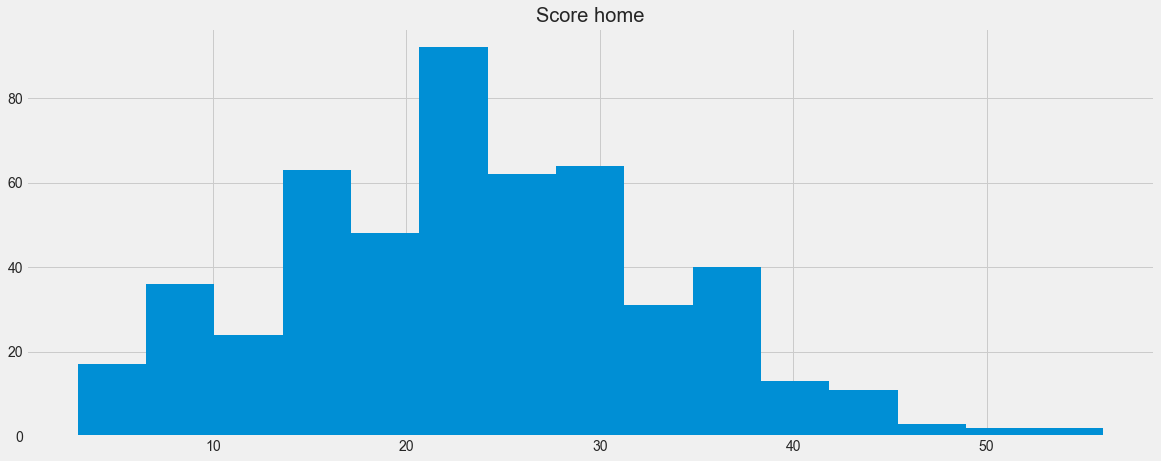

Mean: 23.966535433070867
Median: 24.0
Standard Deviation: 9.598285421997756

Not a normal distribution


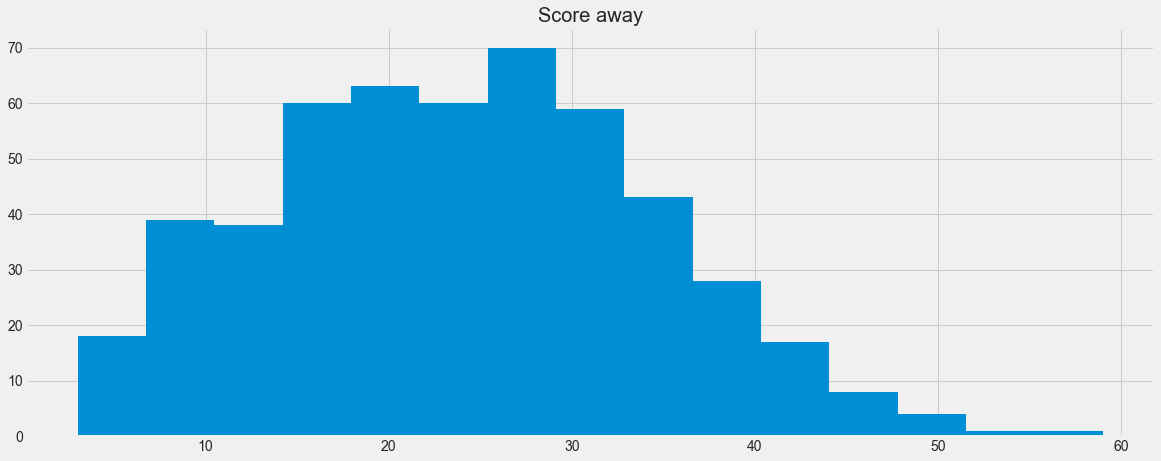

Mean: 23.962671905697444
Median: 24.0
Standard Deviation: 10.181453221287242

Not a normal distribution


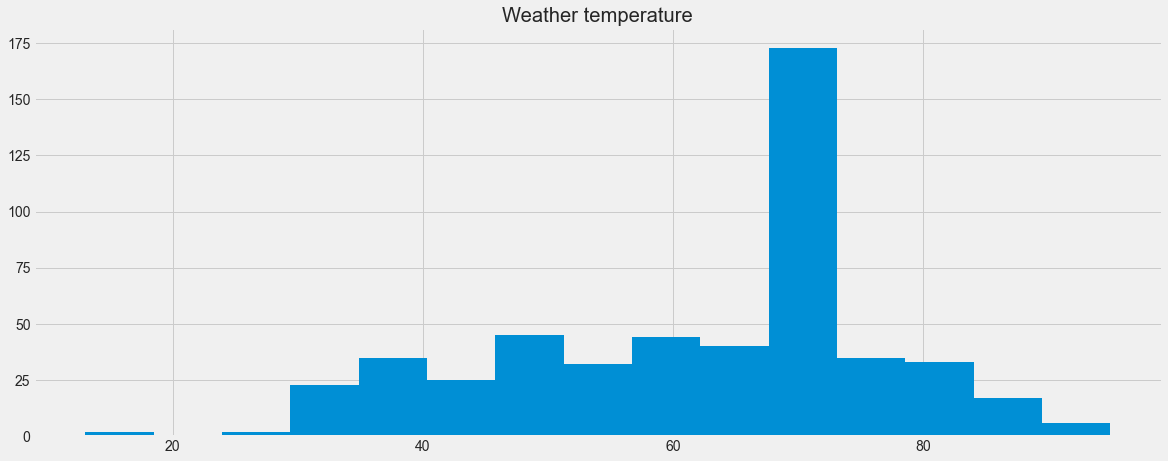

Mean: 62.666015625
Median: 68.0
Standard Deviation: 15.276312750664522

Not a normal distribution


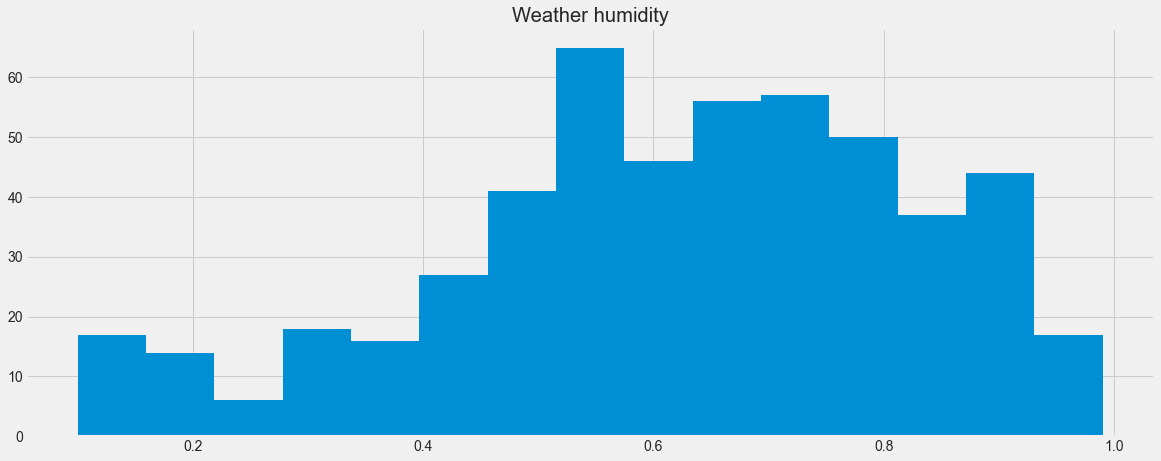

Mean: 0.6218786692759292
Median: 0.64
Standard Deviation: 0.20823344967539636

Not a normal distribution


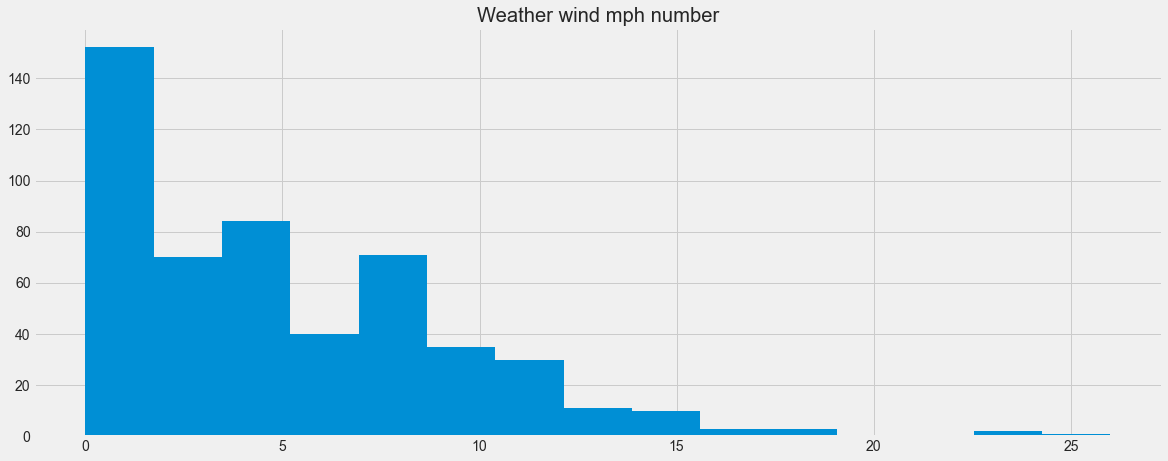

Mean: 4.8671875
Median: 4.0
Standard Deviation: 4.451295189601634

Not a normal distribution


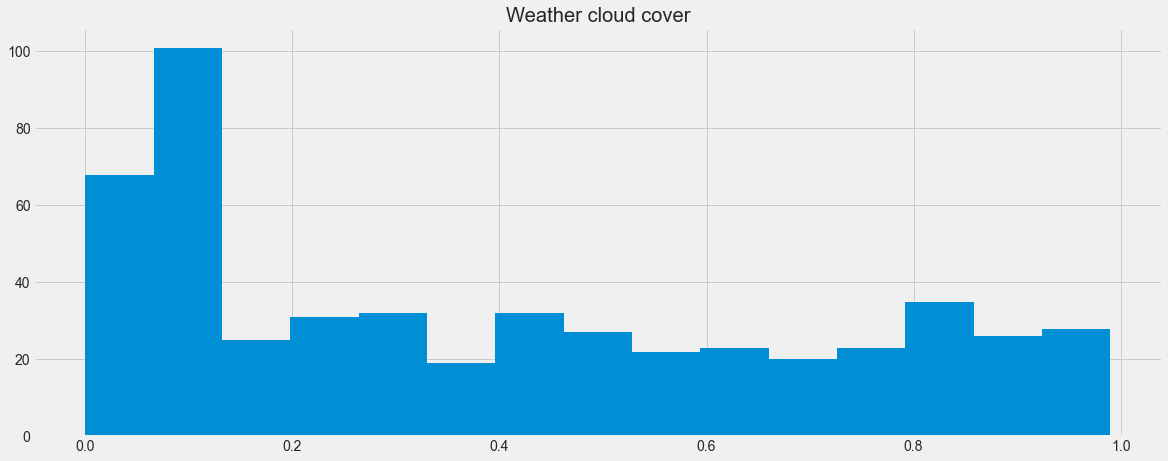

Mean: 0.3938085937499999
Median: 0.32
Standard Deviation: 0.315109626629983

Not a normal distribution


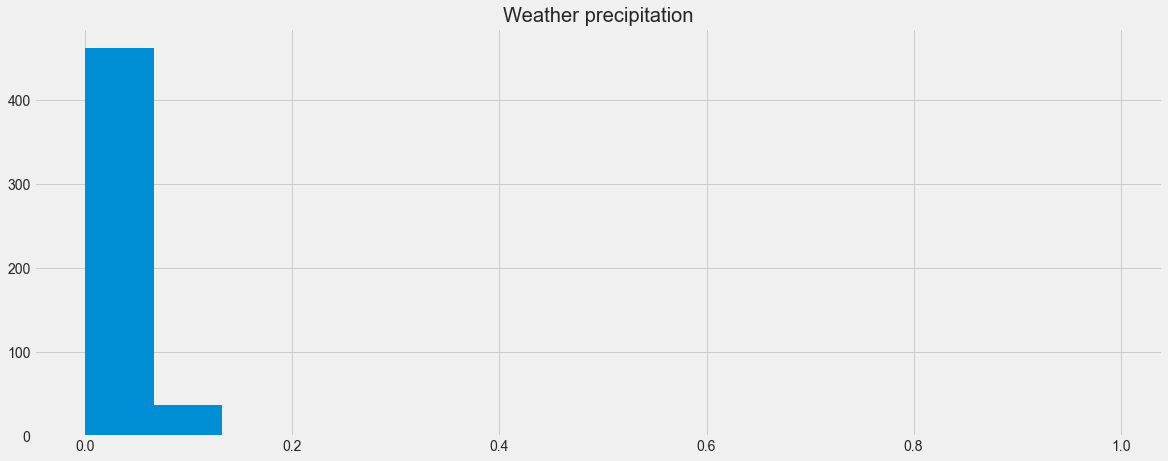

Mean: 0.019003906249999987
Median: 0.0
Standard Deviation: 0.08854987419271133

Not a normal distribution


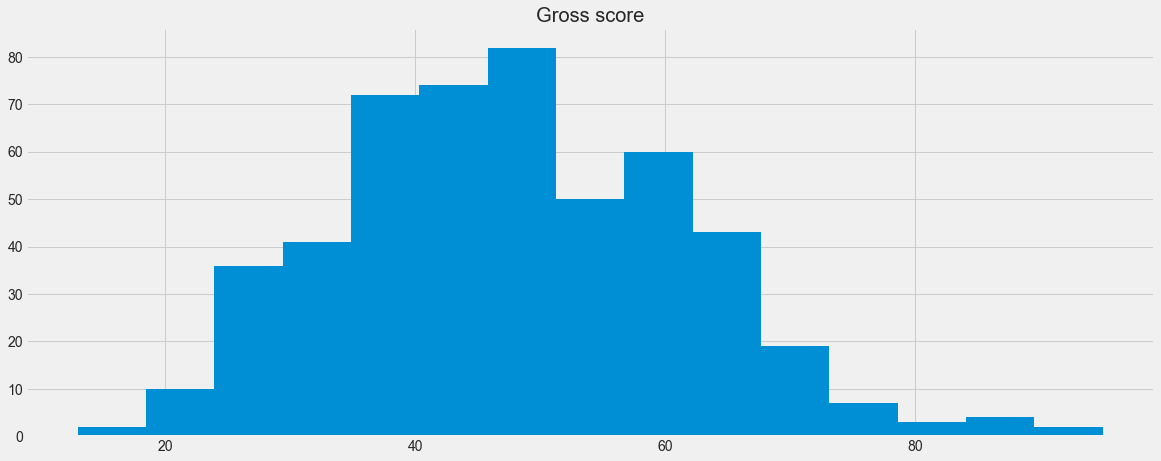

Mean: 47.88514851485149
Median: 47.0
Standard Deviation: 13.714733895382498

Not a normal distribution


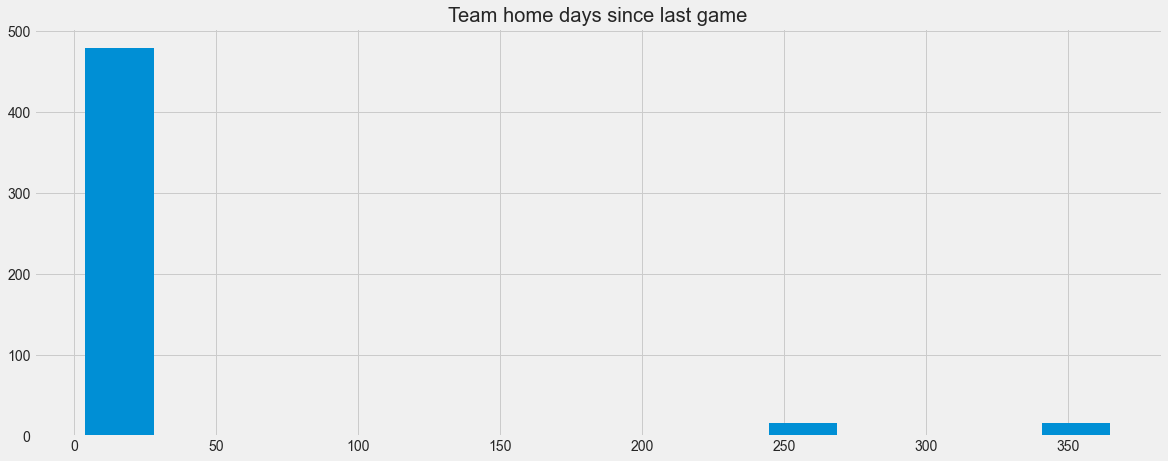

Mean: 26.458984375
Median: 7.0
Standard Deviation: 75.00104550702295

Not a normal distribution


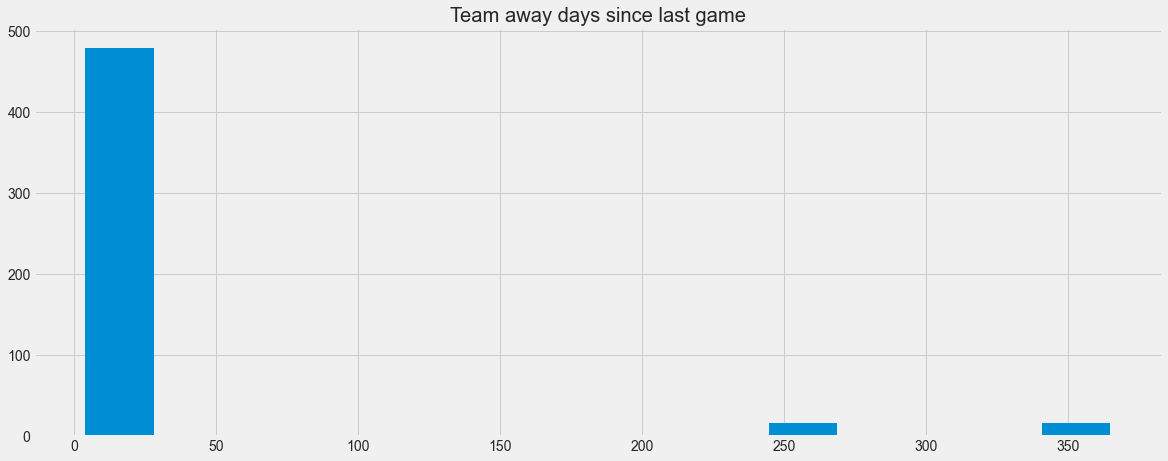

Mean: 26.544921875
Median: 7.0
Standard Deviation: 74.98134101615527

Not a normal distribution


In [325]:
for n in df.drop(['schedule_season','schedule_week','week_day'],axis=1).select_dtypes(include='number'):
    fig, ax = plt.subplots()
    plt.title(f'{n}'.replace('_',' ').capitalize())
    plt.hist(df[n], bins = 15)
    plt.show()
    print(f"Mean: {df[n].mean()}\nMedian: {df[n].median()}\nStandard Deviation: {df[n].std()}\n")
    stat, p = normaltest(df[n])
    alpha = 0.05
    if p > alpha:
        print('Normal distribution')
    else:
        print('Not a normal distribution')

Specifying the number of days between seasons in the ```...days_since_last_game``` columns throws off the data and is not actually accurate (NFL players don't go 365 days without playing a game, as the data shows -- between post-season and pre-season games, the number could be as close as 2 weeks. I'll use 14 days to replace anything above 50, since the histogram above shows 50 as a good identifiable point above which only outliers reside)

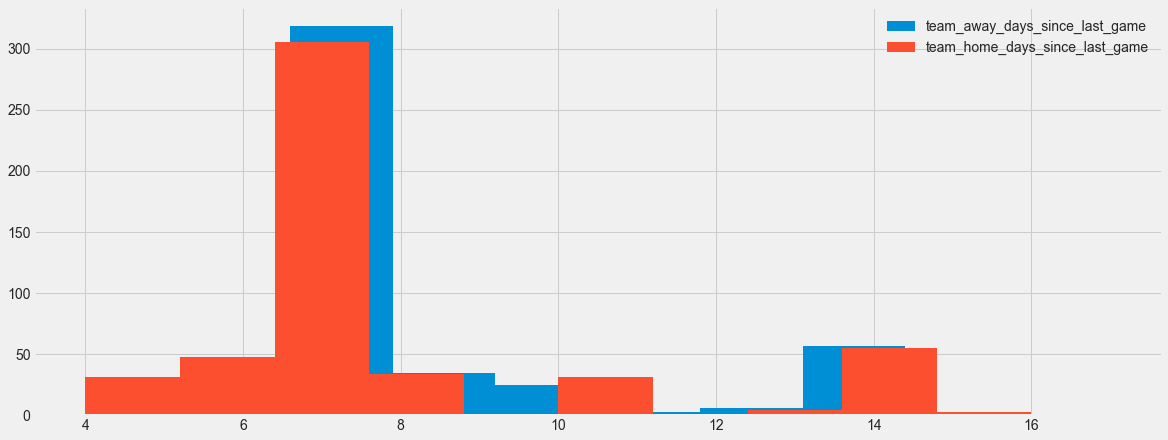

In [327]:
df['team_away_days_since_last_game'].values[df['team_away_days_since_last_game'] > 50] = 14
df['team_home_days_since_last_game'].values[df['team_home_days_since_last_game'] > 50] = 14

for n in df[['team_away_days_since_last_game','team_home_days_since_last_game']]:
    df[n].values[df[n] > 50] = 14
    df[n].hist(legend = 'top right')

```weather_temperature```, ```weather_wind_mph_number```, ```weather_precipitation``` have peaks and outliers that I'd like to see in boxplots instead (but because they have such different x-axis ranges, I'll look at them each in their own boxplots)

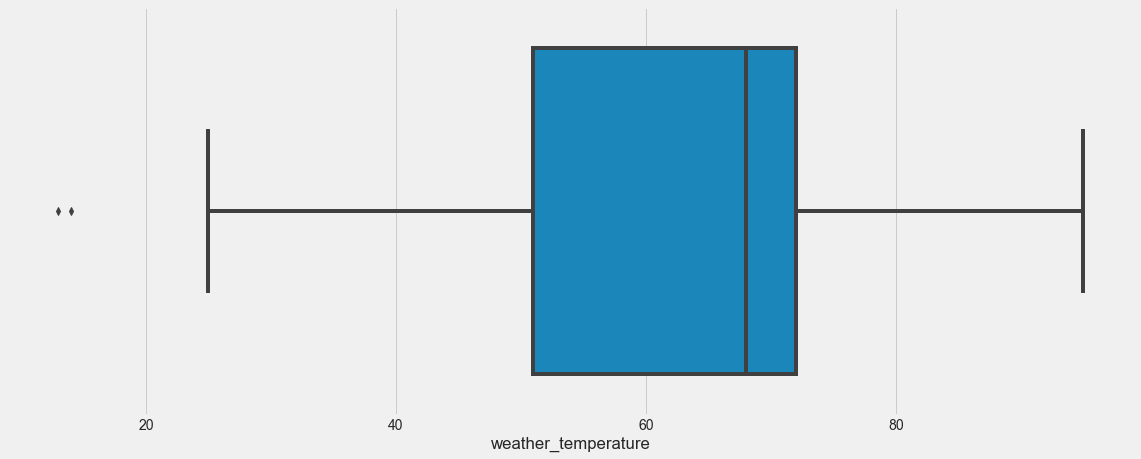

In [244]:
sns.boxplot(x = df['weather_temperature'])
plt.show()

Those low temperature outliers look devastatingly low, let's find out how cold it really was and who had to play in those temperatures

In [250]:
df[df['weather_temperature'] < 20]

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,stadium,stadium_neutral,weather_temperature,...,week_day,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,gross_score,home_key,away_key,team_home_days_since_last_game,team_away_days_since_last_game
214,2019-12-15,2019,15.0,Green Bay Packers,21.0,13.0,Chicago Bears,Lambeau Field,False,13,...,6,7,SouthWest,0.12,0.0,34,GB2019_15,CHI2019_15,7,10
351,2020-10-25,2020,7.0,Denver Broncos,16.0,43.0,Kansas City Chiefs,Sports Authority Field at Mile High,False,14,...,6,8,West - NorthWest,0.10,0.0,59,DEN2020_7,KC2020_7,7,6


Ah yes, December football in the frozen tundra and nearly-November football at mile high. Figures.

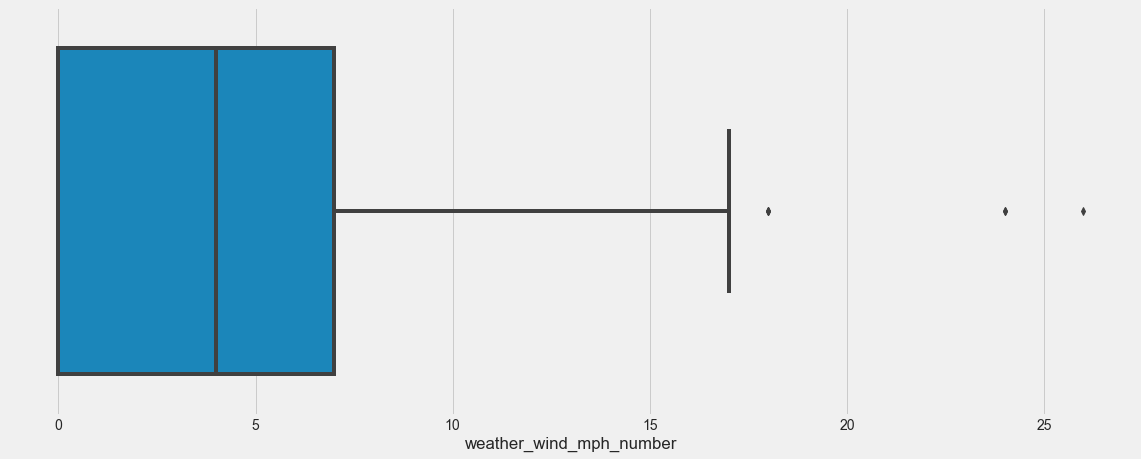

In [245]:
sns.boxplot(x = df['weather_wind_mph_number'])
plt.show()

Can't even imagine playing in winds above 20mph. Let's see who had to do that!

In [252]:
df[df['weather_wind_mph_number'] > 20]

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,stadium,stadium_neutral,weather_temperature,...,week_day,weather_wind_mph_number,weather_wind_direction,weather_cloud_cover,weather_precipitation,gross_score,home_key,away_key,team_home_days_since_last_game,team_away_days_since_last_game
366,2020-11-01,2020,8.0,Cleveland Browns,6.0,16.0,Las Vegas Raiders,FirstEnergy Stadium,False,47,...,6,26,NorthWest,0.89,0.0,22,CLV2020_8,LV2020_8,7,7
369,2020-11-01,2020,8.0,Green Bay Packers,22.0,28.0,Minnesota Vikings,Lambeau Field,False,33,...,6,24,NorthWest,0.79,0.0,50,GB2020_8,MIN2020_8,7,14
394,2020-11-15,2020,10.0,Green Bay Packers,24.0,20.0,Jacksonville Jaguars,Lambeau Field,False,37,...,6,24,West,0.10,0.1,44,GB2020_10,JAX2020_10,10,7


**Note**: stay away from the midwest and the mountains between October and January if you want to play football outdoors!

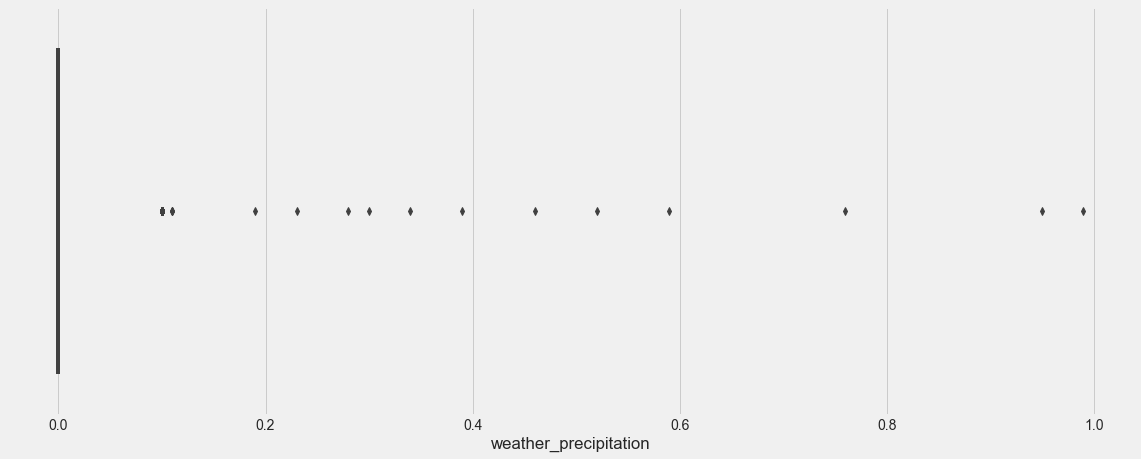

In [285]:
sns.boxplot(x = df['weather_precipitation'])
plt.show()

So only a handful of games are played in precipitation. Let's see the unique ```weather_detail``` values where precipitation is greater than 0.1 to see how many of these are snow games and how many are rain games

In [329]:
df['weather_detail'].loc[df['weather_precipitation'] > 0.1].value_counts(sort=False)

Overcast                   1
Possible Light Rain        1
Drizzle                    3
Mostly Cloudy              2
Possible Drizzle           2
DOME                       5
Humid and Mostly Cloudy    1
Name: weather_detail, dtype: int64

To do: Remove DOME precipitation

Next, I want to see scatterplots of different variables, so I'll standardize that by defining a function and applying it to columns in which I'm interested.

In [295]:
def scatterMaker(dataframe, x_column_name, y_column_name, **kwargs):
    """
    Produces a scatter plot of non-zero values from dataframe columns
    Input: Dataframe, two column names from the same dataframe, and any scatterplot arguments
    """
    x = dataframe[x_column_name].replace({0 : np.nan, 0.0 : np.nan})
    y = dataframe[y_column_name].replace({0 : np.nan, 0.0 : np.nan})
    fig, ax = plt.subplots()
    ax.scatter(x, y, **kwargs)
    plt.title(f'{x_column_name} versus {y_column_name}'.replace('_',' ').capitalize())
    plt.xlabel(x_column_name.replace('_',' ').capitalize())
    plt.ylabel(y_column_name.replace('_',' ').capitalize())
    plt.show()

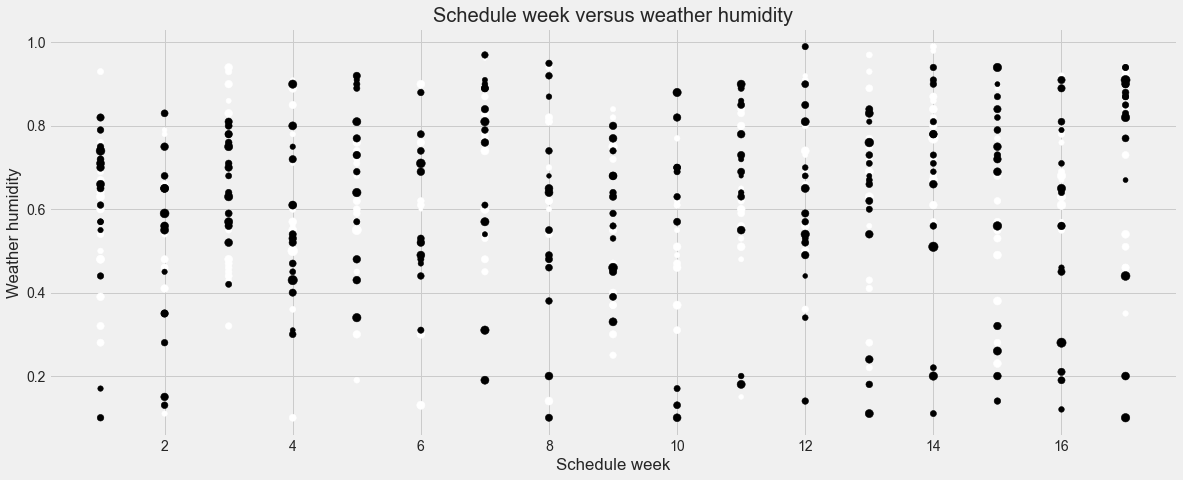

In [296]:
scatterMaker(df, 'schedule_week', 'weather_humidity', s = df['gross_score'], c = df['schedule_season'])

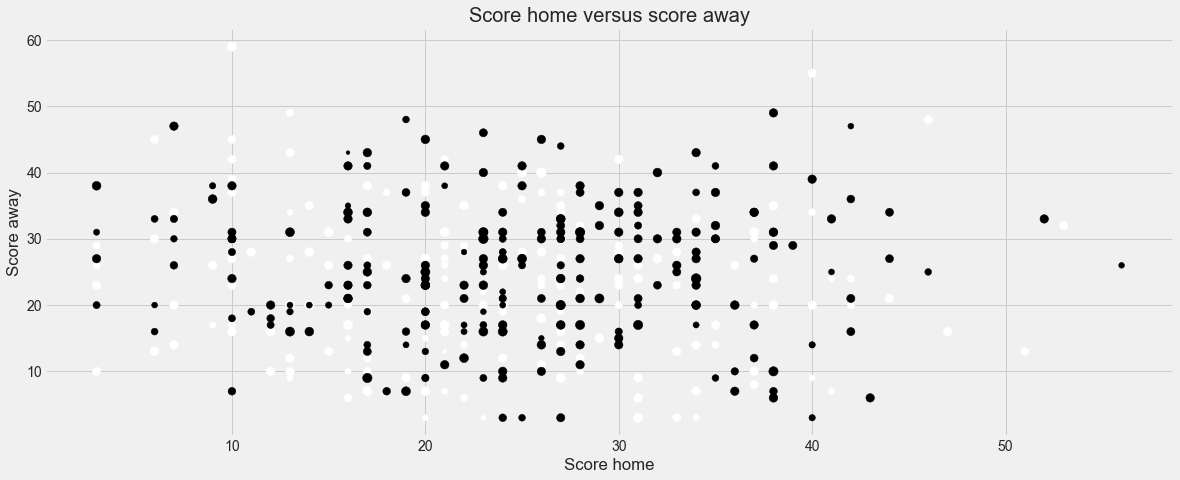

In [297]:
scatterMaker(df, 'score_home', 'score_away', c = df['schedule_season'], s = df['weather_temperature'])

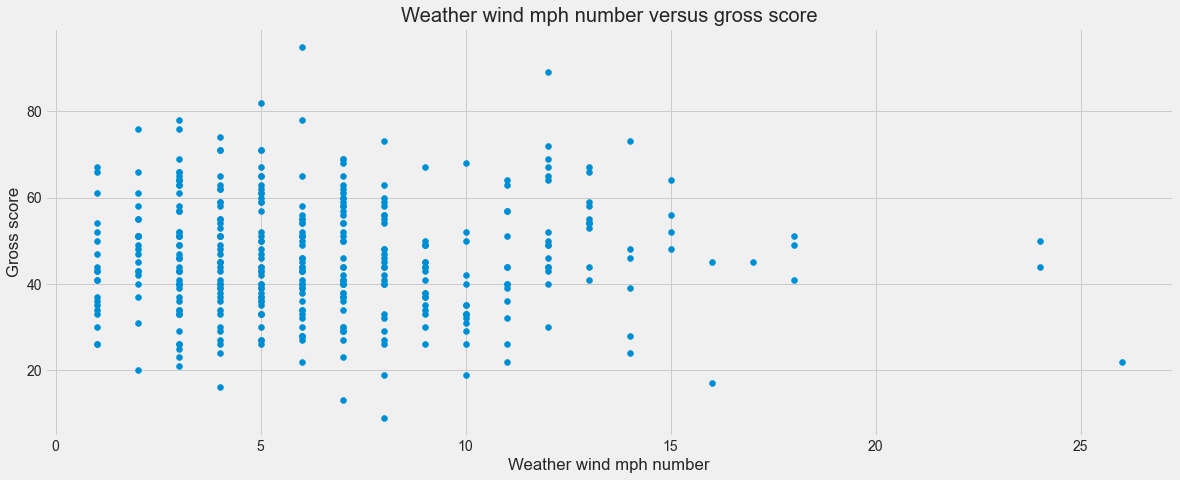

In [298]:
scatterMaker(df, 'weather_wind_mph_number', 'gross_score')

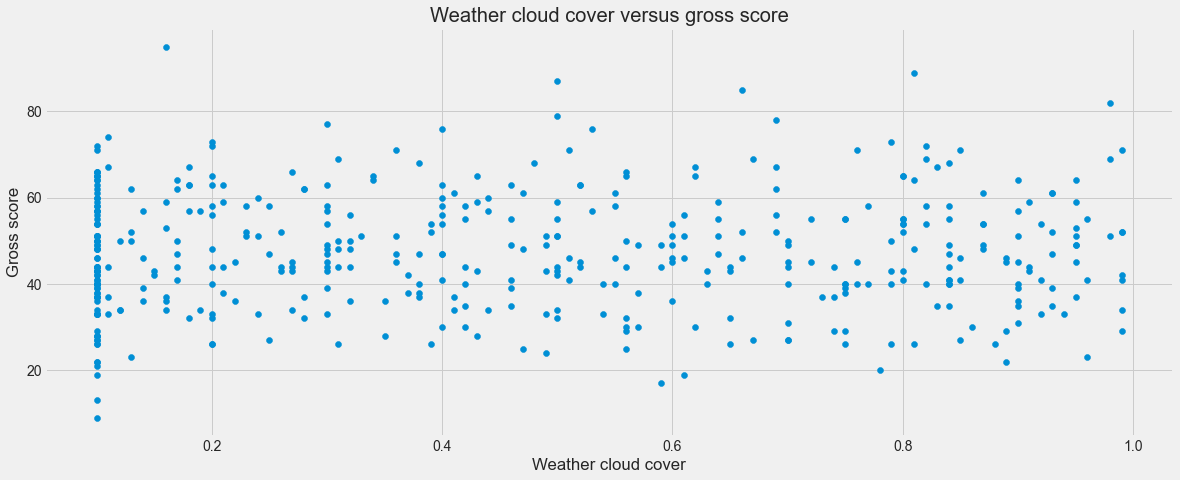

In [299]:
scatterMaker(df, 'weather_cloud_cover', 'gross_score')

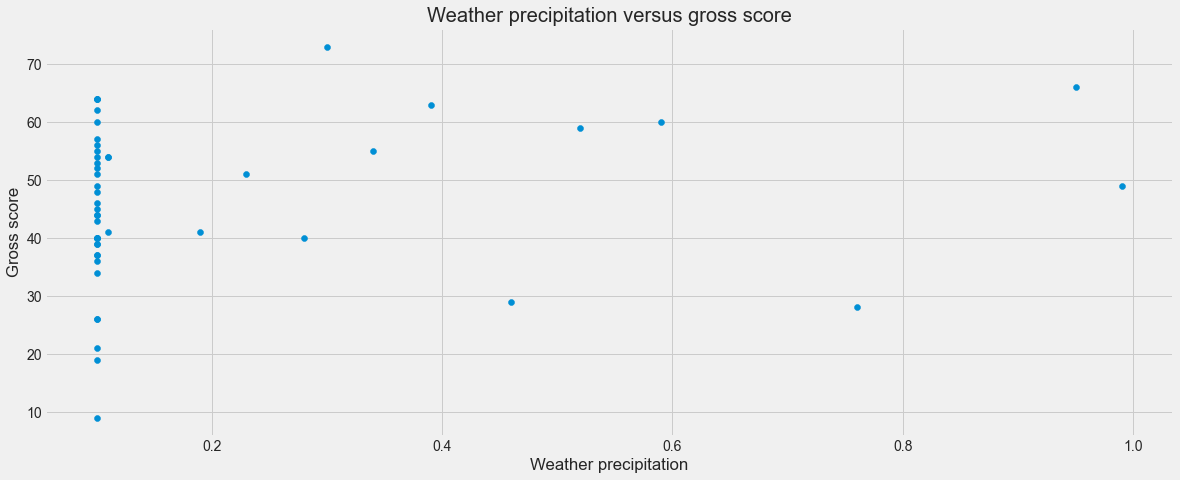

In [302]:
scatterMaker(df, 'weather_precipitation', 'gross_score')

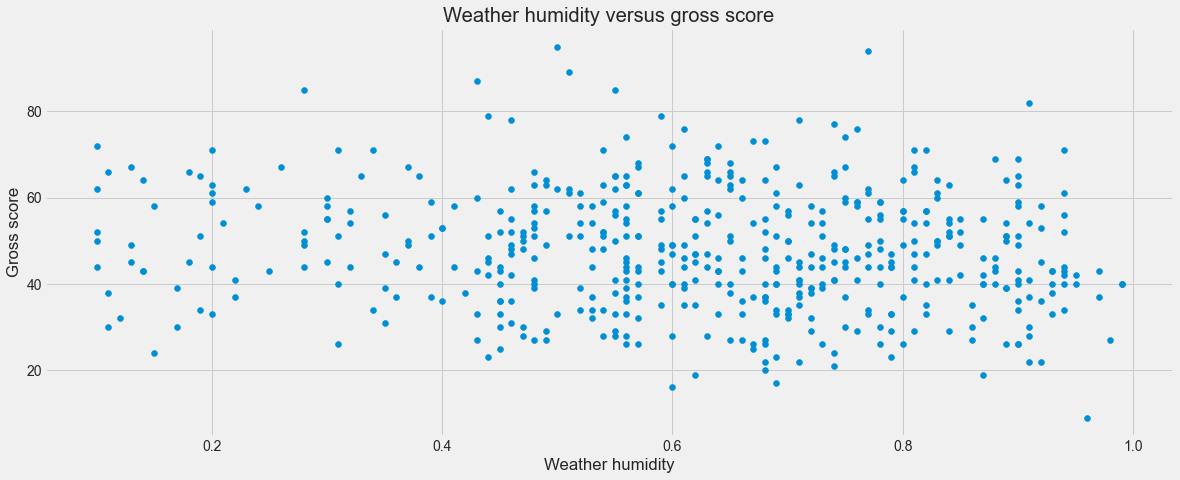

In [304]:
scatterMaker(df, 'weather_humidity', 'gross_score')

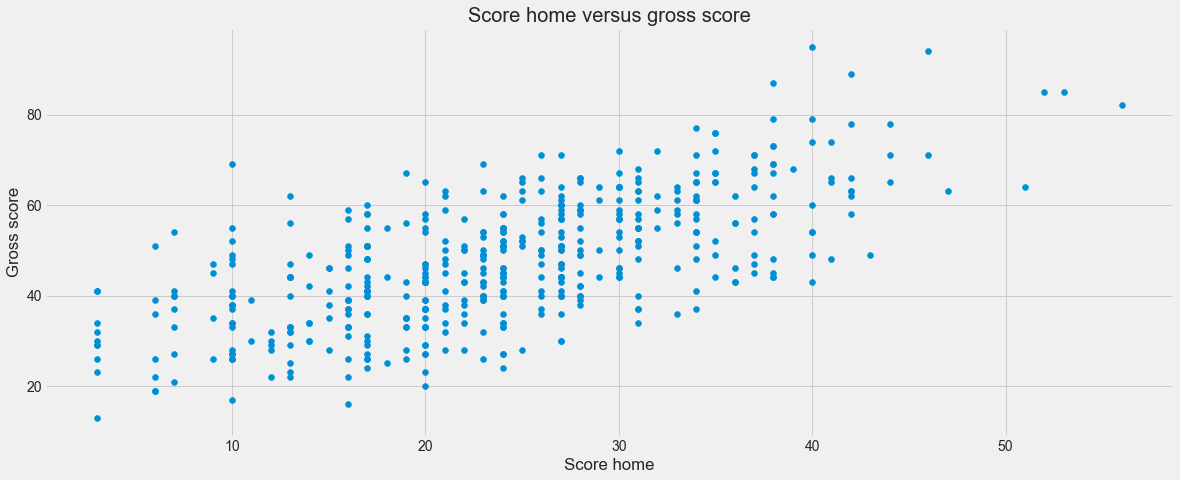

In [305]:
scatterMaker(df, 'score_home', 'gross_score')

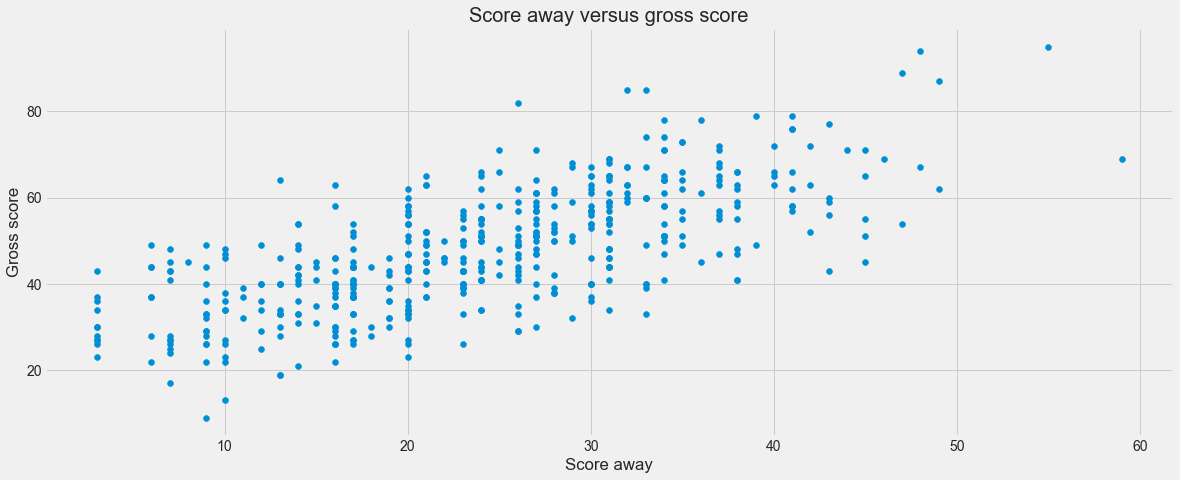

In [306]:
scatterMaker(df, 'score_away', 'gross_score')

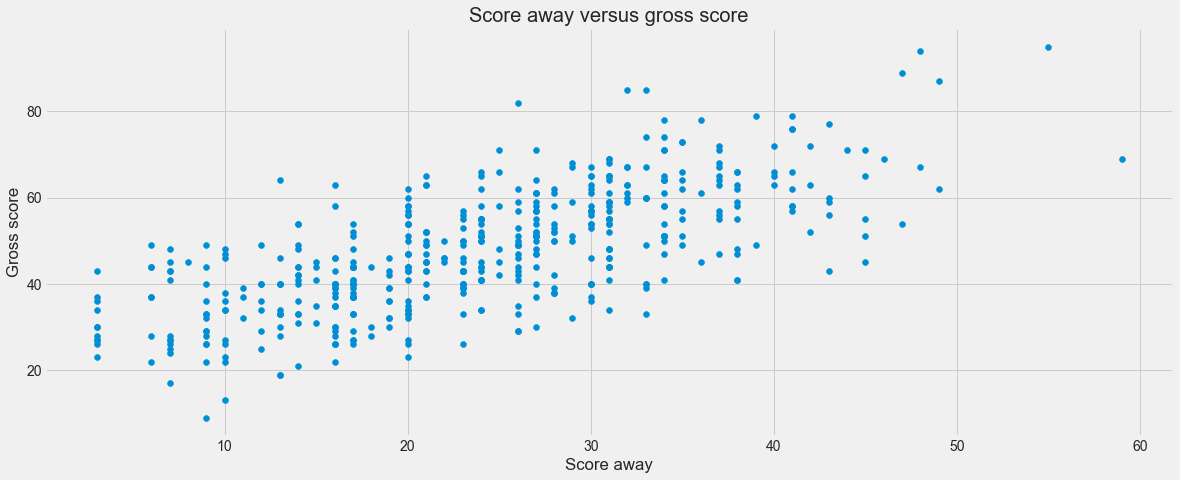

In [307]:
scatterMaker(df, 'score_away', 'gross_score')

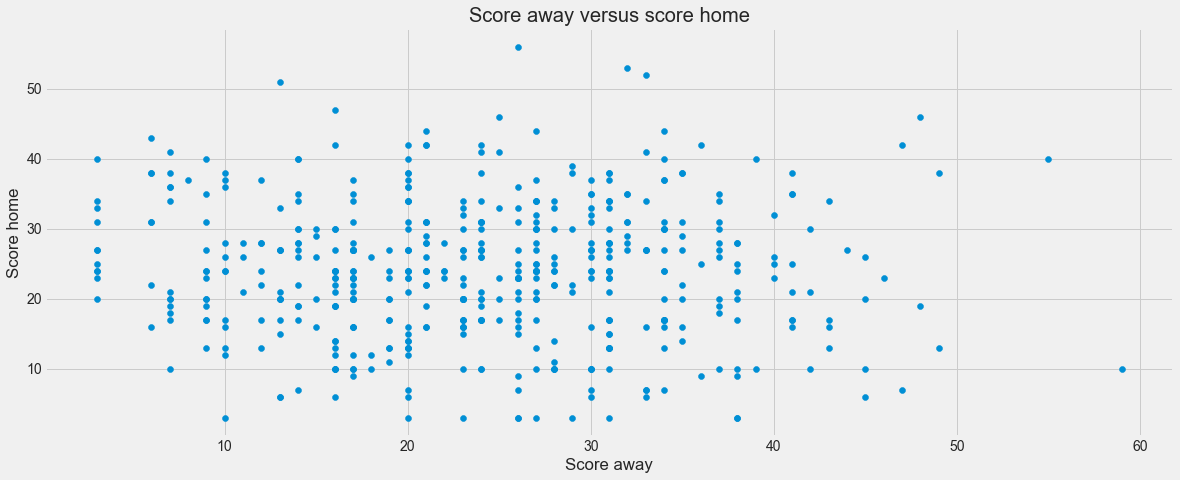

In [308]:
scatterMaker(df, 'score_away', 'score_home')

<AxesSubplot:>

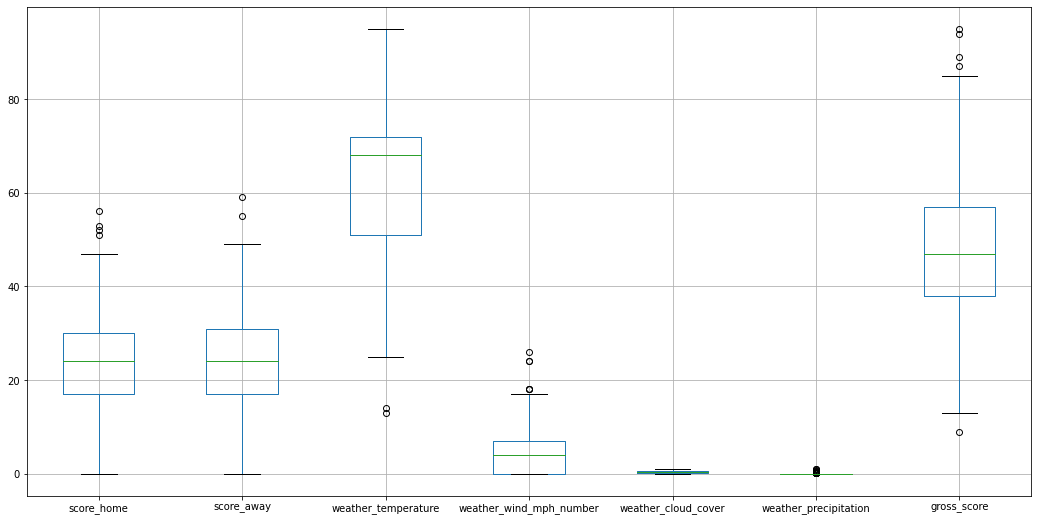

In [100]:
df.drop(['schedule_season','schedule_week','stadium_neutral','weather_humidity','week_day'], axis = 1).boxplot()

<AxesSubplot:>

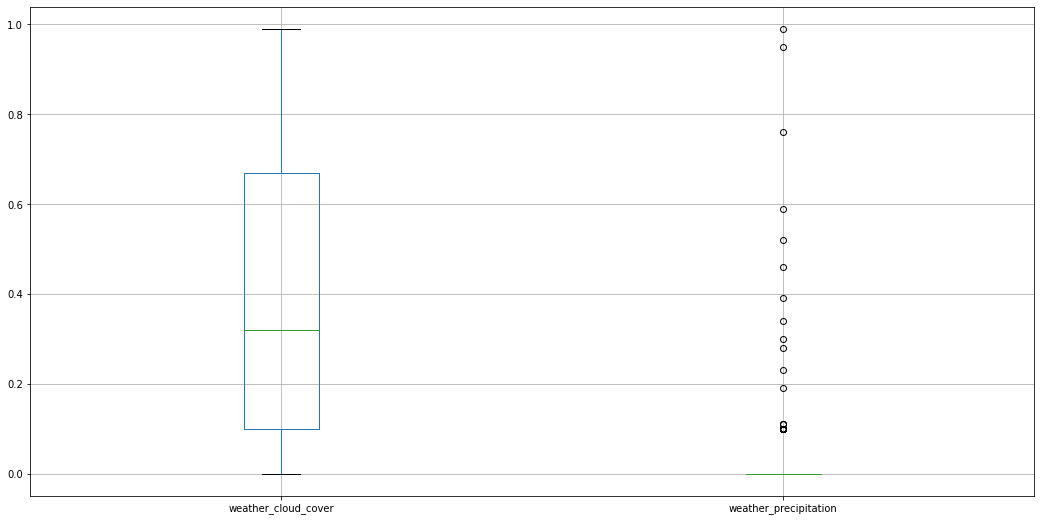

In [104]:
df[['weather_cloud_cover','weather_precipitation']].boxplot()

## Exploring Categorical Data
<a id='exploring_categorical_data_cell'></a>

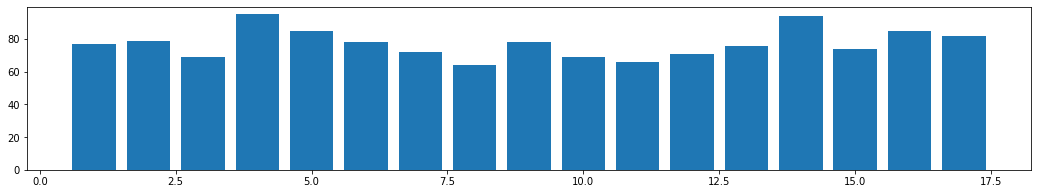

In [122]:
plt.bar(df['schedule_week'],df['gross_score'])
plt.show()

In [314]:
df.select_dtypes(include='object')

,schedule_date,team_home,team_away,stadium,weather_wind_mph,weather_detail,team_away_short,team_home_short,week_id,weather_wind_direction,home_key,away_key
0,2019-09-05,Chicago Bears,Green Bay Packers,Soldier Field,7mi East - SouthEast,Clear,GB,CHI,2019_1,East - SouthEast,CHI2019_1,GB2019_1
1,2019-09-08,Arizona Cardinals,Detroit Lions,University of Phoenix Stadium,0.0,DOME,DET,ARZ,2019_1,No wind,ARZ2019_1,DET2019_1
2,2019-09-08,Carolina Panthers,Los Angeles Rams,Bank of America Stadium,3mi East,Clear,LAR,CAR,2019_1,East,CAR2019_1,LAR2019_1
3,2019-09-08,Cleveland Browns,Tennessee Titans,FirstEnergy Stadium,6mi NorthEast,Mostly Cloudy,TEN,CLV,2019_1,NorthEast,CLV2019_1,TEN2019_1
4,2019-09-08,Dallas Cowboys,New York Giants,AT&T Stadium,0.0,DOME,NYG,DAL,2019_1,No wind,DAL2019_1,NYG2019_1
...,...,...,...,...,...,...,...,...,...,...,...,...
507,2021-01-03,New England Patriots,New York Jets,Gillette Stadium,5mi NorthEast,Overcast,NYJ,NE,2020_17,NorthEast,NE2020_17,NYJ2020_17
508,2021-01-03,New York Giants,Dallas Cowboys,MetLife Stadium,8mi NorthEast,Overcast,DAL,NYG,2020_17,NorthEast,NYG2020_17,DAL2020_17
509,2021-01-03,Philadelphia Eagles,Washington Football Team,Lincoln Financial Field,6mi North - NorthEast,Overcast,WAS,PHI,2020_17,North - NorthEast,PHI2020_17,WAS2020_17
510,2021-01-03,San Francisco 49ers,Seattle Seahawks,Levi's Stadium,2mi North - NorthWest,Mostly Cloudy,SEA,SF,2020_17,North - NorthWest,SF2020_17,SEA2020_17


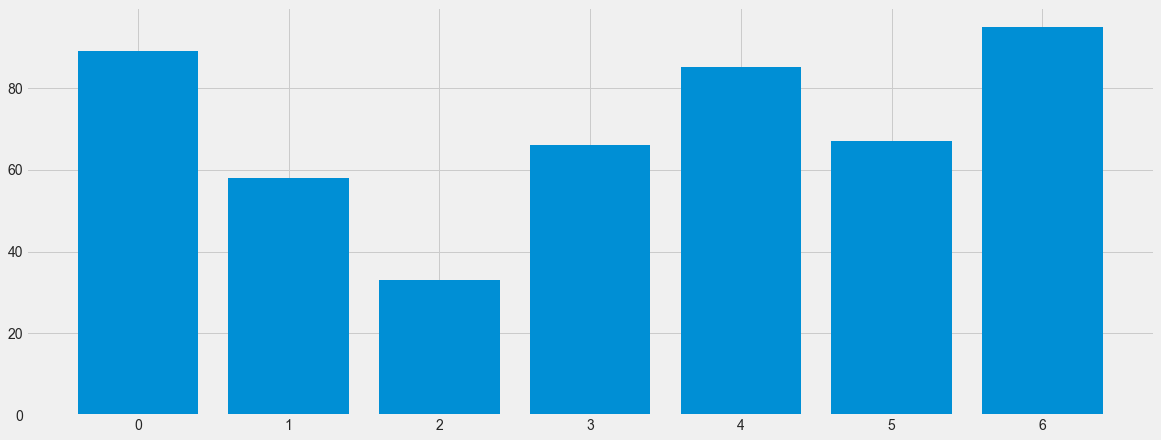

In [303]:
plt.bar(df['week_day'], df['gross_score'])
plt.show()

In [21]:
df.nunique(axis = 0)

schedule_date              101
schedule_season              2
schedule_week               17
team_home                   34
score_home                  46
score_away                  48
team_away                   34
stadium                     37
stadium_neutral              2
weather_temperature         69
weather_wind_mph           175
weather_humidity            86
weather_detail              21
team_away_short             32
team_home_short             32
week_id                     34
week_day                     7
weather_wind_mph_number     21
weather_wind_direction      17
weather_cloud_cover         85
weather_precipitation       15
gross_score                 69
dtype: int64